In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
i_max = 10000
n_max = 1000
r_0 = 0
kr=1
kp= 50
gammar= 1/5
gammap= 1/30

b= kp/gammar
print(b)

250.0


In [ ]:
def escalas_temporales(i_max,kr,gammap,gammar,b):
  p = np.zeros((i_max))
  t0= np.zeros((i_max))
  for i in range(i_max):
    t_1= 1/kr*np.log(1/random.random())
    t_2= 1/(gammap*(kr/gammar))*np.log(1/random.random())
    if t_1<t_2:
      p[i]=p[i-1]+1
    else:
      p[i]=p[i-1]-1

    t0[i]=t0[i-1]+min(t_1,t_2)

  return p,t0

In [ ]:
p = np.zeros((i_max))
t0= np.zeros((i_max))
for i in range(i_max):
  t_1= 1/kr*np.log(1/random.random())
  t_2= 1/(gammap*(kr/gammar))*np.log(1/random.random())
  if t_1<t_2:
    p[i]=p[i-1]+1
  else:
    p[i]=p[i-1]-1

  t0[i]=t0[i-1]+min(t_1,t_2)

In [ ]:
p,t0=escalas_temporales(i_max,kr,gammap,gammar,b)

Text(0.5, 0, 'Tiempo')

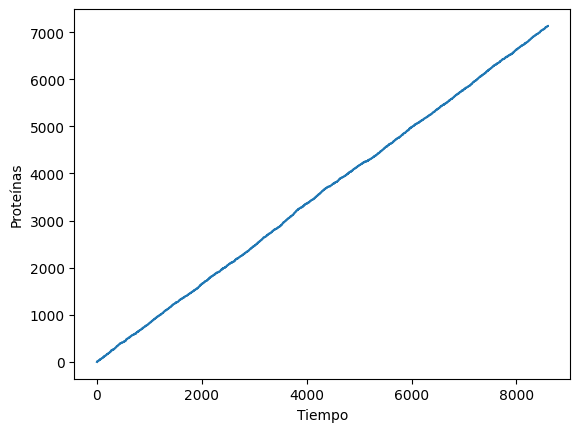

In [ ]:
plt.step(t0,p)
plt.ylabel("Proteínas")
plt.xlabel("Tiempo")

In [ ]:
def poblacion(f,i_max,n_max,kr,gammap,gammar,b):
  dt= 1
  tf= np.arange(0,i_max,dt)
  fig, ax= plt.subplots(1, 1, figsize=(8, 6))
  p0 = []
  for n in range(1, n_max):
    p,t= f(i_max,kr,gammap,gammar,b)
    p0.append(p)
    ax.step(tf,p)
    ax.set_ylabel("Proteínas")
    ax.set_xlabel("Tiempo")

  plt.show()
  pn = np.vstack(p0)
  return pn,tf

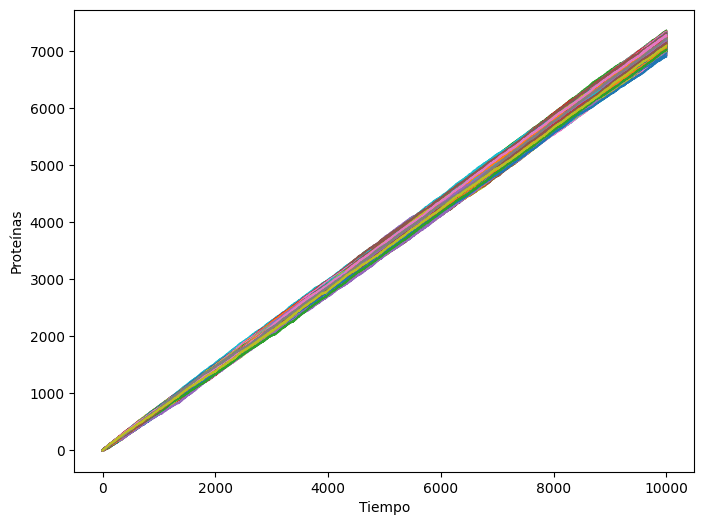

In [ ]:
pn,tf = poblacion(escalas_temporales,i_max,n_max,kr,gammap,gammar,b)

In [ ]:
def escalas_temporales_poisson(i_max,kr,gammap,gammar,b):
  p = np.zeros((i_max))
  t0= np.zeros((i_max))
  for i in range(i_max):
    t_1= np.log(1/random.random())/kr
    t_2= np.log(1/random.random())/(gammap*(kr/gammar))
    if t_1<t_2:
      p[i]=p[i-1]+np.random.poisson(b,1)[0]
    else:
      p[i]=p[i-1]-np.random.poisson(b,1)[0]

    t0[i]=t0[i-1]+min(t_1,t_2)
  return p,t0

In [ ]:
p1,t1 = escalas_temporales_poisson(i_max,kr,gammap,gammar,b)

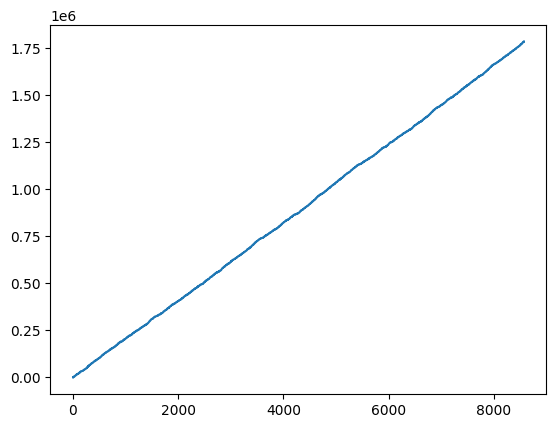

In [ ]:
plt.step(t1,p1)

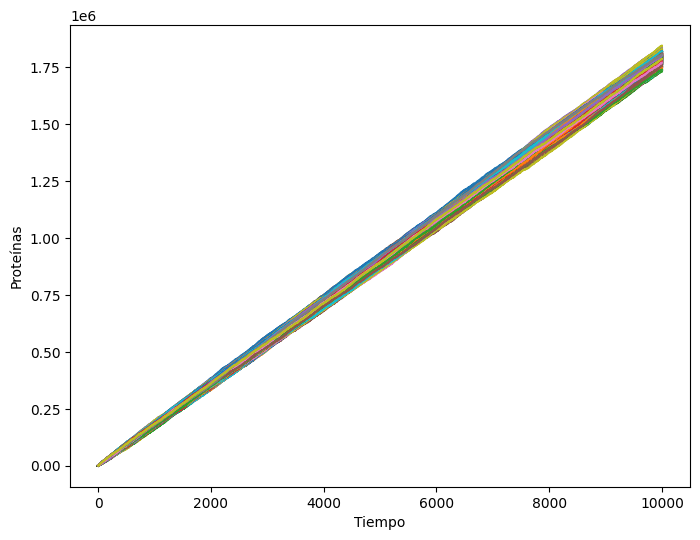

In [ ]:
pn1,tf1 = poblacion(escalas_temporales_poisson,i_max,n_max,kr,gammap,gammar,b)